### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [142]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [143]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
y = pd.DataFrame(boston['target'], columns = ['Price'])

In [144]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [145]:
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [148]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

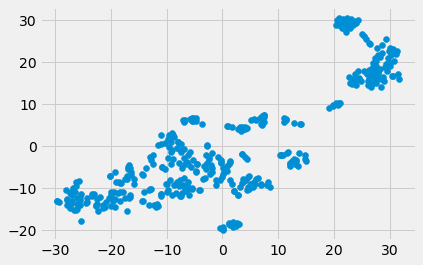

In [149]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show;

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [150]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3,max_iter = 100, random_state=42)
kmeans_model.fit(X_train_scaled)
train_labels = kmeans_model.predict(X_train_scaled)


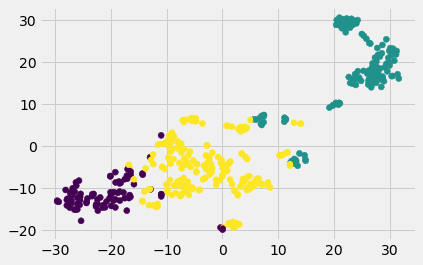

In [151]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)



In [152]:
y_train['Price'].mean()

22.79653465346535

In [153]:
def mean_pr_cr(y,label):
    for i in range(0,3):
        print('Кластер {}'.format(i))
        print(y[label == i].mean())

In [154]:
mean_pr_cr(y_train['Price'],train_labels)

Кластер 0
27.788372093023252
Кластер 1
16.165354330708666
Кластер 2
24.958115183246072


In [155]:
mean_pr_cr(X_train['CRIM'], train_labels)

Кластер 0
0.07356558139534886
Кластер 1
10.797028425196853
Кластер 2
0.42166020942408367


### Задание 3 *
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [156]:
test_label = kmeans_model.predict(X_test_scaled)

In [157]:
mean_pr_cr(y_test['Price'],test_label)

Кластер 0
31.35
Кластер 1
16.437142857142856
Кластер 2
21.860784313725492


In [158]:
mean_pr_cr(X_test['CRIM'],test_label)

Кластер 0
0.062060000000000004
Кластер 1
10.165531142857143
Кластер 2
0.26607882352941176
